In [1]:
import matplotlib
import seaborn as sns
import sys
import os
sys.path.append(os.path.join(os.path.curdir, 'pyKrig'))
import kriging as kr
import sequential_gaussian_simulation as sgs
matplotlib.use('Agg')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

/Users/padarnwilson/.virtualenvs/cleanmile/lib/python2.7/site-packages/matplotlib/__init__.py:1312: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# SGS Example

In [2]:
datafile = 'data/Ginninderra 2013 soil flux surveys_for python.xlsx'
xl = pd.ExcelFile(datafile)
data = xl.parse(xl.sheet_names[2])  # read a specific sheet to DataFrame
data = data[['x_m', 'y_m', 'raw_flux_mmol/m2/d']].rename(columns={'raw_flux_mmol/m2/d':'flux'})

/Users/padarnwilson/.virtualenvs/cleanmile/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


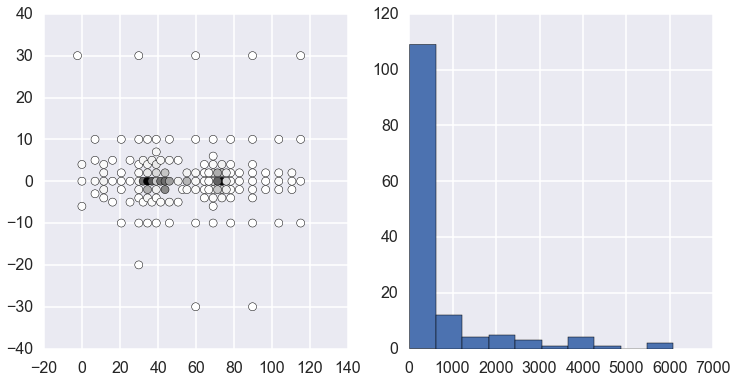

In [3]:
sns.set_context('poster')
plt.rcParams['figure.figsize'] = 12, 6
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter( data.x_m, data.y_m, c=data.flux, s=64)
_ = ax2.hist(data.flux)

Kriging example

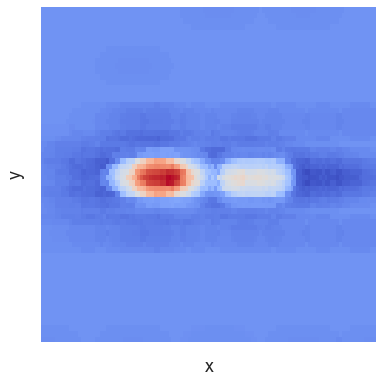

In [42]:
sns.set_context('poster')
plt.rcParams['figure.figsize'] = 6, 6
fig, ax = plt.subplots(1,1)
model = kr.krig_model(data)
kr.krig_contour_model(model, ax=ax)

Sequential Gaussian Simulation Example

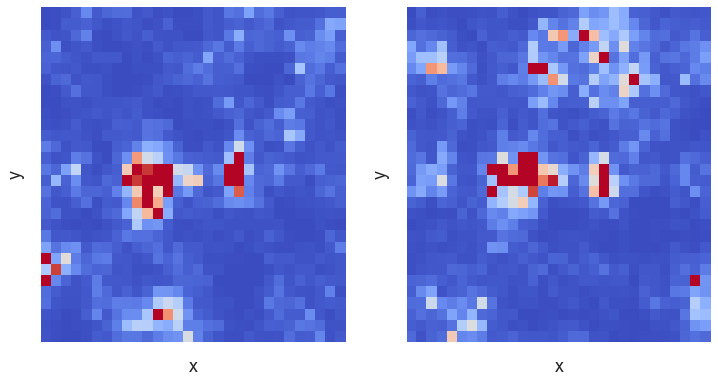

In [4]:
sns.set_context('poster')
plt.rcParams['figure.figsize'] = 12, 6
fig, (ax1, ax2) = plt.subplots(1,2)
for ax in (ax1, ax2):
    sgs_result = sgs.sgs(data, xsteps=30, ysteps=30, invert_transform=True)
    sgs.show_sgs_result(sgs_result, ax)

# Other Formula

In [9]:
# http://naldc.nal.usda.gov/download/49159/PDF
# All references I coiuld find disagree with the addition in the sum on the bottom line. I think this is probably
# the more correct form

from operator import mul
from math import factorial
def f(n, j, s):
    n = np.float(n)
    return (n-1)**(2*j-1)/(n**j * reduce(mul, [(n+i) for i in range(1, 2*j, 2)], 1) ) / factorial(j) * s**(2*j)

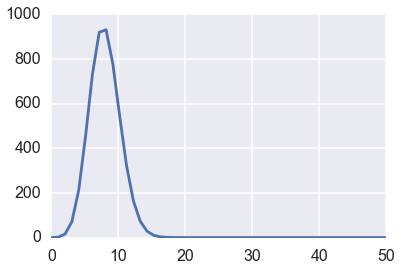

In [10]:
xx = np.linspace(0, 50)
fig = plt.figure()
plt.plot(xx, [f(10, int(i), 5) for i in xx])
plt.show()